In [1]:
import collections
import inspect

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog

In [2]:
graphiclog.__file__, dir(graphiclog)

('/home/administrator/code/python/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

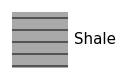

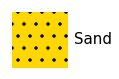

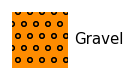

In [3]:
graphiclog.defaults.litholegend.plot()

In [4]:
transforms = {c : graphiclog.utils.string2array_pandas for c in ['depth_m', 'grain_size_mm']}

beds = pd.read_csv('../data/AllBedsWithProfiles_CLEAN.csv', converters=transforms)
beds.head()

,name,count,collection,eod,eodnum,tops,th,bases,gs_tops_mm,gs_tops_psi,...,mean_gs_psi,max_gs_mm,max_gs_psi,ng,ar,depth_m,grain_size_mm,grain_size_psi,missing_tops,missing_sample
0,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.81684,0.31082,22.50602,0.115051,-3.119655,...,-3.106893,0.117046,-3.094850,0.520514,0.021978,"[22.8168, 22.703, 22.5337, 22.506]","[0.1151, 0.1157, 0.117, 0.117]",[-3.11904026 -3.11153923 -3.09541957 -3.09541957],0.0,0.0
1,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,22.50602,0.60931,21.89671,0.001000,-9.965784,...,-9.965784,0.001000,-9.965784,0.520514,0.021978,"[22.506, 21.8967]","[0.001, 0.001]",[-9.96578428 -9.96578428],0.0,0.0
2,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.89671,0.10463,21.79208,0.125380,-2.995625,...,-2.995625,0.125380,-2.995625,0.520514,0.021978,"[21.8967, 21.7921]","[0.1254, 0.1254]",[-2.99539075 -2.99539075],0.0,0.0
3,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.79208,0.11694,21.67514,0.001000,-9.965784,...,-9.965784,0.001000,-9.965784,0.520514,0.021978,"[21.7921, 21.6751]","[0.001, 0.001]",[-9.96578428 -9.96578428],0.0,0.0
4,Marnoso 1,1,Marnoso-Arenacea,basin plain,0,21.67514,0.13232,21.54282,0.134306,-2.896405,...,-2.736260,0.160420,-2.640075,0.520514,0.021978,"[21.6751, 21.6351, 21.5674, 21.5428]","[0.1343, 0.1447, 0.1604, 0.1604]",[-2.89646879 -2.78886317 -2.64025395 -2.64025395],0.0,0.0


In [9]:
beds.columns

Index(['name', 'count', 'collection', 'eod', 'eodnum', 'tops', 'th', 'bases',
       'gs_tops_mm', 'gs_tops_psi', 'snd_shl', 'mean_gs_mm', 'mean_gs_psi',
       'max_gs_mm', 'max_gs_psi', 'ng', 'ar', 'depth_m', 'grain_size_mm',
       'grain_size_psi', 'missing_tops', 'missing_sample'],
      dtype='object')

In [6]:
bed_seqs = []

datacols = ['th', 'gs_tops_psi', 'mean_gs_psi', 'depth_m', 'grain_size_psi']
metacols=['name', 'count', 'collection', 'eod', 'eodnum']

for name, grp in beds.groupby('count'):
    
    bed_seqs.append(graphiclog.BedSequence.from_dataframe(grp, topcol='tops', basecol='bases',
                                                 component_map=graphiclog.defaults.DEFAULT_COMPONENT_MAP,
                                                 datacols=datacols, metacols=metacols))


In [8]:
bed_seqs[0].start, bed_seqs[0].stop

(Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}),
 Position({'middle': 22.81684, 'units': 'm'}))

In [ ]:
fig, ax = plt.subplots(figsize=(14,50), ncols=2)
bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[0])

bedseq.resample_data('depth_m', 0.01)

bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[1])

In [ ]:
bedseq.min_field('grain_size_psi')

In [ ]:
-1 > bedseq.max_field('grain_size_psi')

In [ ]:
fig, ax = plt.subplots(figsize=(7,30))
bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', 
            wentworth='coarse', ax=ax)